In [45]:
import numpy as np

import scipy as sc
import scipy.ndimage
import scipy.signal

#plots
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (30.0, 30.0)
#mpl.rc('text', usetex = True)
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib inline

# Fourier series and Shannon sampling



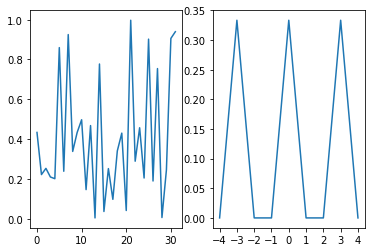

In [46]:
#Simple random signal
size=32
signal = np.random.rand(size)
plt.figure()
plt.subplot(1,2,1)
plt.plot(signal, label="Random signal")

#Now define a "Dirac comb"
csize=2*4+1
supp=np.arange(-(csize//2),csize//2+1)
comb = np.float64((supp%3)==0)
comb = comb/np.size(comb.nonzero())
ax = plt.subplot(1,2,2)
plt.plot(supp, comb, label="Dirac comb")
ax.set_xticks(supp)
plt.show()

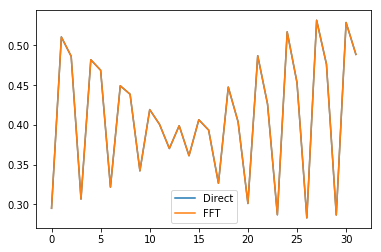

In [102]:
# Then see what happens when convolving in direct space versus
loopSize = 10

#Fourier space circular convolution
padSize=(size-csize)//2
combPadded = np.concatenate([np.zeros(size-padSize-csize),comb,np.zeros(padSize)])
#combPadded = np.concatenate([np.zeros(padSize),comb,np.zeros(size-padSize-csize)])
#combPadded = np.concatenate([comb,np.zeros(size-csize)])
assert(np.size(combPadded)==size)
combfft=np.fft.fft(np.fft.fftshift(combPadded))**loopSize
res2 = np.real(np.fft.ifft(np.fft.fft(signal)*combfft))

#Direct space circular convolution
res1 = signal.copy()
for i in range(loopSize):
  res1=sc.ndimage.filters.convolve1d(res1,comb,mode='wrap')
    
#plot both
plt.figure()
ax = plt.subplot(1,1,1)
plt.plot(res1, label="Direct")
plt.plot(res2, label="FFT")
plt.legend()
plt.show()